In [43]:
import  re
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import unidecode
import numpy as np 
import pandas as pd
import sys  
from importlib import reload


review = pd.read_csv("Restaurant_Reviews.csv",delimiter='\t',header=None, names=['title', 'rating'])

In [44]:
review.head()

,title,rating
0,"Loved it...friendly servers, great food, wonde...",NaN
1,The Heart Attack Grill in downtown Vegas is an...,NaN
2,Not much seafood and like 5 strings of pasta a...,NaN
3,The salad had just the right amount of sauce t...,NaN
4,"The ripped banana was not only ripped, but pet...",NaN


In [45]:
!pip install unidecode

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [46]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Zeeshan
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Zeeshan
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Zeeshan
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Zeeshan
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
all_df = pd.concat([review])
all_df.reset_index(drop=True, inplace=True)

titles = all_df['title'].get_values()
ratings = all_df['rating'].get_values()

clean_titles = []

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

for title in titles:
    clean = unidecode.unidecode(title)
    clean = re.sub('[^a-zA-Z ]', '',clean)
    clean = clean.lower()
    clean = word_tokenize(clean)
    temp = []
    for word in clean:
        if not word in stopwords.words('english'):
            temp.append(lemmatizer.lemmatize(word))
    clean_titles.append(temp)

newcsv = []
for i in clean_titles:
    newcsv.append(" ".join(i))
for i in range(10):
    print(newcsv[i])
    
    
np.savetxt('Restaurant_Review.csv', [p for p in zip(newcsv,ratings)], delimiter=',', fmt='%s')

loved itfriendly server great food wonderful imaginative menu
heart attack grill downtown vega absolutely flatlined excuse restaurant
much seafood like string pasta bottom
salad right amount sauce power scallop perfectly cooked
ripped banana ripped petrified tasteless
least think refill water struggle wave minute
place receives star appetizer
cocktail handmade delicious
wed definitely go back
glad found place


In [52]:
data = pd.read_csv("Restaurant_Review.csv",header=None, names=['review', 'rating'])
data.head(10)


print(data.columns)

data.head(10)

a=len(data)
for f in range(a):
    data.review[f]=data.review[f].lower()
    
data.head(10)

Index(['review', 'rating'], dtype='object')


C:\Users\Zeeshan Khan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,review,rating
0,loved itfriendly server great food wonderful i...,NaN
1,heart attack grill downtown vega absolutely fl...,NaN
2,much seafood like string pasta bottom,NaN
3,salad right amount sauce power scallop perfect...,NaN
4,ripped banana ripped petrified tasteless,NaN
5,least think refill water struggle wave minute,NaN
6,place receives star appetizer,NaN
7,cocktail handmade delicious,NaN
8,wed definitely go back,NaN
9,glad found place,NaN


In [53]:
positive_data = pd.read_csv('positive-words.txt', sep="\t", header = None)
positive_data.head(10)

,0
0,affirmation
1,affirmative
2,affluence
3,affluent
4,afford
5,affordable
6,affordably
7,afordable
8,agile
9,agilely


In [54]:
import re
data['positive'] =1
for f in range(a):
    count=0
    words=re.split('\s+',data.review[f])
    for x in words:
          for pos_word in positive_data[0]:
                if x==pos_word:
                    count=count+1
    data.positive[f]=count

C:\Users\Zeeshan Khan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [67]:
data2=pd.read_csv("Rating.csv",header=None, names=['review', 'rating'])
data2.head(5)
data.rating = data2.rating
data.head(10)

,review,rating,positive
0,loved itfriendly server great food wonderful i...,1,4
1,heart attack grill downtown vega absolutely fl...,0,0
2,much seafood like string pasta bottom,0,1
3,salad right amount sauce power scallop perfect...,1,2
4,ripped banana ripped petrified tasteless,0,0
5,least think refill water struggle wave minute,0,0
6,place receives star appetizer,1,0
7,cocktail handmade delicious,1,1
8,wed definitely go back,1,0
9,glad found place,1,1


In [72]:
from nltk.corpus import wordnet as wn
food = wn.synset('food.n.02')
food_words=list(set([w for s in food.closure(lambda s:s.hyponyms()) for w in s.lemma_names()]))

print(food_words)

['bamboo_shoot', 'collard_greens', 'soya', 'fresh_bean', 'cold_cuts', 'melon', 'litchee', 'fillet_of_sole', 'edible_bean', 'molasses_cookie', 'blood_sausage', 'garlic_bread', 'sea_bass', 'hardtack', 'sea_scallop', 'ruggelach', 'Kentucky_wonder_bean', 'white_bread', 'breakfast_food', 'pepperoni', 'natal_plum', 'fries', 'fennel', 'seed_cake', 'cracked-wheat_bread', 'Spanish_onion', 'Atlantic_salmon', 'ham', 'round_clam', 'soft-shelled_crab', 'spud', 'bacon', 'carrot', 'taro', 'plum_tomato', 'soft_roll', 'dark_chocolate', 'persimmon', 'mush', 'delicatessen_food', 'naan', 'timbale', 'poultry', 'taro_root', 'roll', 'flitch', 'cake_mix', 'bagel', 'beef_tongue', 'edda', 'ecrevisse', 'stick', 'eating_apple', 'french_fries', 'brown_butter', 'Boston_cream_pie', 'muesli', 'angel_food_cake', 'slipskin_grape', 'peach', 'Swedish_rye', 'bosc', 'lamb_roast', 'chocolate_candy', 'aubergine', 'pattypan_squash', 'hamburger_bun', 'chinook_salmon', 'akee', 'tortilla', 'honeycomb_tripe', 'refrigerator_cookie

In [73]:
import re
data['food_count'] =1
for f in range(a):
    count=0
    words=re.split('\s+',data.review[f])
    for x in words:
          for food_word in food_words:
                if x==food_word:
                    count=count+1
    data.food_count[f]=count

C:\Users\Zeeshan Khan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [74]:
data.head(20)

,review,rating,positive,food_count
0,loved itfriendly server great food wonderful i...,1,4,0
1,heart attack grill downtown vega absolutely fl...,0,0,1
2,much seafood like string pasta bottom,0,1,2
3,salad right amount sauce power scallop perfect...,1,2,1
4,ripped banana ripped petrified tasteless,0,0,1
5,least think refill water struggle wave minute,0,0,0
6,place receives star appetizer,1,0,0
7,cocktail handmade delicious,1,1,0
8,wed definitely go back,1,0,0
9,glad found place,1,1,0


In [75]:
point=[]
no_point=100
for i in range(no_point):
    point.append((data.positive[i],data.food_count[i]))
    
    
print(point)

[(4, 0), (0, 1), (1, 2), (2, 1), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, 1), (2, 0), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (4, 1), (2, 0), (1, 0), (1, 0), (1, 0), (0, 3), (0, 0), (1, 1), (1, 1), (1, 2), (1, 0), (0, 0), (2, 0), (0, 0), (3, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 1), (2, 2), (2, 0), (1, 0), (3, 3), (1, 0), (1, 0), (3, 0), (1, 0), (0, 0), (1, 0), (3, 0), (0, 0), (2, 0), (2, 0), (1, 0), (0, 0), (1, 0), (1, 0), (0, 1), (1, 0), (0, 0), (0, 0), (2, 0), (3, 4), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 3), (0, 0), (2, 3), (2, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0), (2, 0), (0, 0), (0, 0), (3, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0)]


In [77]:
import matplotlib.pyplot as plt

In [78]:
import math
def distance(point1,point2):
    dist=math.sqrt(((point2[1]-point1[1])**2) + ((point2[0]-point1[0])**2))
    return dist

In [79]:
def func(clas):
    temx=0
    temy=0
    for i in range(len(clas)):
        temx+=clas[i][0]
        temy+=clas[i][1]
    temx=temx/len(clas)
    temy=temy/len(clas)
    return temx,temy

In [80]:
t1=[]
t1.append(point[0])
temp1=0

t2=[]
t2.append(point[1])
temp2=1

t3=[]
t3.append(point[2])
temp3=2

class1=[]
class2=[]
class3=[]

for j in range(10000):
    del class1[:]
    del class2[:]
    del class3[:]
    for i in range(no_point):
        l1=distance(point[i],t1[0])
        l2=distance(point[i],t2[0])
        l3=distance(point[i],t3[0])
        if(l1==min(l1,l2,l3)):
            class1.append((point[i]))
        elif(l2==min(l1,l2,l3)):
            class2.append((point[i]))
        else:
            class3.append((point[i]))
    tempx=0
    tempy=0
    tempx1=0
    tempy1=0
    tempy2=0
    tempy2=0
    

    tempx,tempy=func(class1)
    tempx1,tempy1=func(class2)
    tempx2,tempy2=func(class3)
    
    print(tempx,tempy,tempx1,tempy1,tempx2,tempy2)
    
    if tempx==t1[0][0] and tempy==t1[0][1] and tempx1==t2[0][0] and tempy1==t2[0][1] and tempx2==t3[0][0] and tempy2==t3[0][1]:
        break
    else:
        del t1[:]
        t1.append((tempx,tempy))
        del t2[:]
        t2.append((tempx1,tempy1))
        del t3[:]
        t3.append((tempx2,tempy2))
        


2.5 0.0625 0.52 0.14666666666666667 1.6666666666666667 2.5555555555555554
2.4705882352941178 0.11764705882352941 0.52 0.14666666666666667 1.625 2.75
2.4705882352941178 0.11764705882352941 0.52 0.14666666666666667 1.625 2.75


In [81]:
print(class1)
print(class2)
print(class3)

[(4, 0), (2, 1), (2, 0), (4, 1), (2, 0), (2, 0), (3, 0), (2, 0), (3, 0), (3, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (3, 0), (2, 0)]
[(0, 1), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (1, 1), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0)]
[(1, 2), (0, 3), (1, 2), (2, 2), (3, 3), (3, 4), (1, 3), (2, 3)]


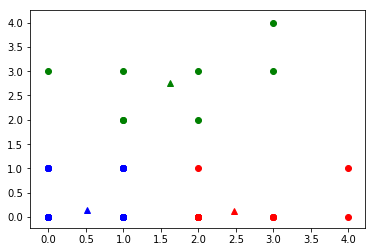

In [82]:
for i in range(len(class1)):
    plt.scatter(class1[i][0],class1[i][1],color='r')
for i in range(len(class2)):
    plt.scatter(class2[i][0],class2[i][1],color='b')
for i in range(len(class3)):
    plt.scatter(class3[i][0],class3[i][1],color='g')
plt.plot(t1[0][0],t1[0][1],'r^',t2[0][0],t2[0][1],'b^',t3[0][0],t3[0][1],'g^')